In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy import signal, interpolate

from datetime import time, timedelta
import matplotlib.dates as mdates
from datetime import datetime

from MAppServer.settings import DOWNLOAD_FOLDER_ABSOLUTE_PATH


# Try things out with one user

Found the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11KD_activity_2023-07-12_23-36-02.csv`
n days:  18


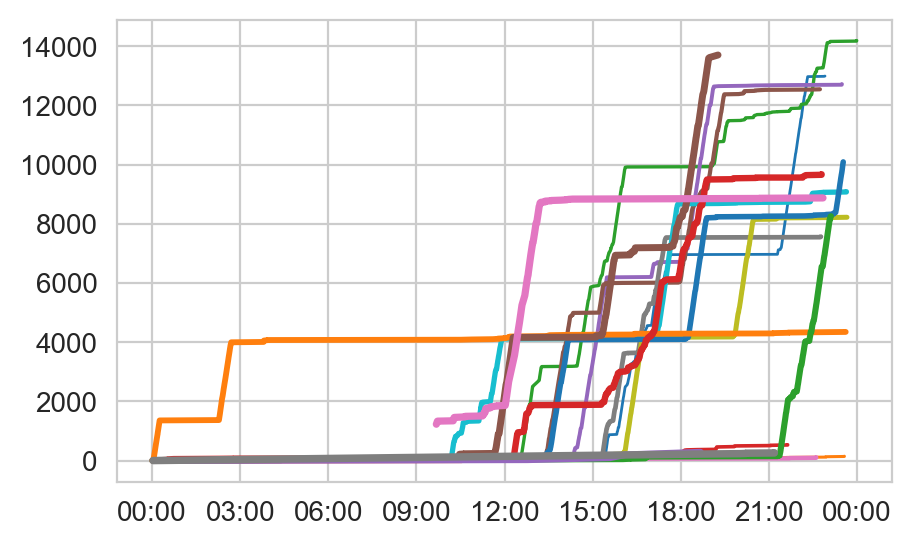

In [3]:
user = "11KD" #"09AU"  "11KD"
for file in glob.glob(f"{DOWNLOAD_FOLDER_ABSOLUTE_PATH}/{user}_activity*.csv"):
    print(f"Found the file `{file}`")

df = pd.read_csv(file, index_col=0)
df.dt = pd.to_datetime(df.dt, utc=False, format='ISO8601')
df.dt = df.dt.dt.tz_convert('Europe/London')

uniq_date = df.dt.dt.date.unique()

print("n days: ", len(uniq_date))

fig, ax = plt.subplots(figsize=(5, 3))
for date in uniq_date:
    df_date = df[df.dt.dt.date == date]
    min_date = df.dt.dt.date.min()
    n_days_since_beginning = (date - min_date).days
    x = df_date.dt.map(lambda entry: entry.replace(day=1, month=1, year=2000))

    y = df_date.step_midnight.values

    # Patch in case of re-installation
    if np.sum(np.diff(y) < 0) > 0:
        idx = 1 + np.arange(len(y)-1)[np.diff(y) < 0][0]
        y[idx:] =  y[idx-1] + y[idx:] - y[idx]

    # Plot
    ax.plot(x, y, linewidth=1 + n_days_since_beginning*0.1)
    xformatter = mdates.DateFormatter('%H:%M', )
    ax.xaxis.set_major_formatter(xformatter)

plt.show()

In [4]:
for date in uniq_date:
    df_date = df[df.dt.dt.date == date]
    min_date = df.dt.dt.date.min()
    n_days_since_beginning = (date - min_date).days
    x = df_date.dt.map(lambda entry: entry.replace(day=1, month=1, year=2000))
    min_ts = np.min(x).timestamp()
    x_sec = x.map(lambda entry: entry.timestamp()).values - min_ts
    y = df_date.step_midnight.values
    break

plt.show()

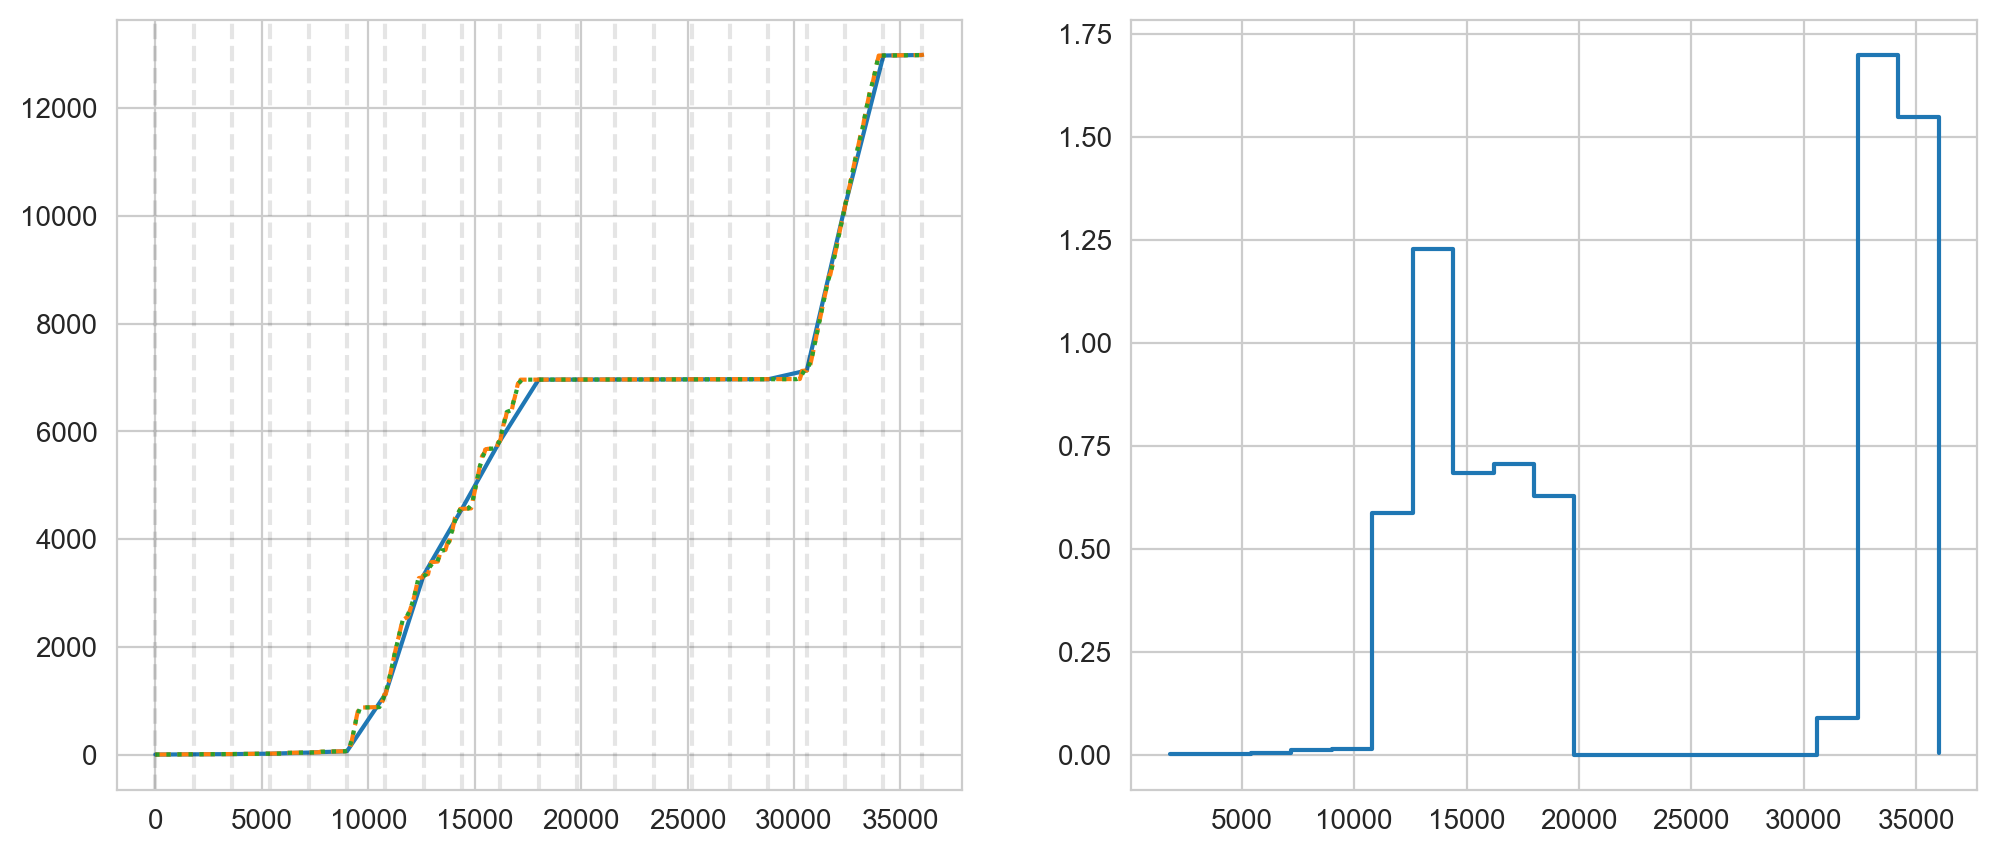

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

ax = axes[0]

dx = 60*30

f = interpolate.interp1d(x_sec, y, kind="linear")
min_val = int(x_sec.min())
max_val = int(x_sec.max() - x_sec.min())
n_val = max_val - min_val
x_new = np.arange(min_val, max_val, dx)
y_new = f(x_new)
ax.plot(x_new, y_new)
# plt.step(x_new, y_new, where="post")

ax.plot(x_sec, y, linestyle="--")

x_lin = np.linspace(min_val, max_val, 200)
y_lin = f(x_lin)
ax.plot(x_lin, y_lin, linestyle=":")
for x in x_new:
    ax.axvline(x, linestyle="--", color="black", alpha=0.1)

ax = axes[1]
ax.step(x_new[1:], np.diff(y_new)/dx, where="post");

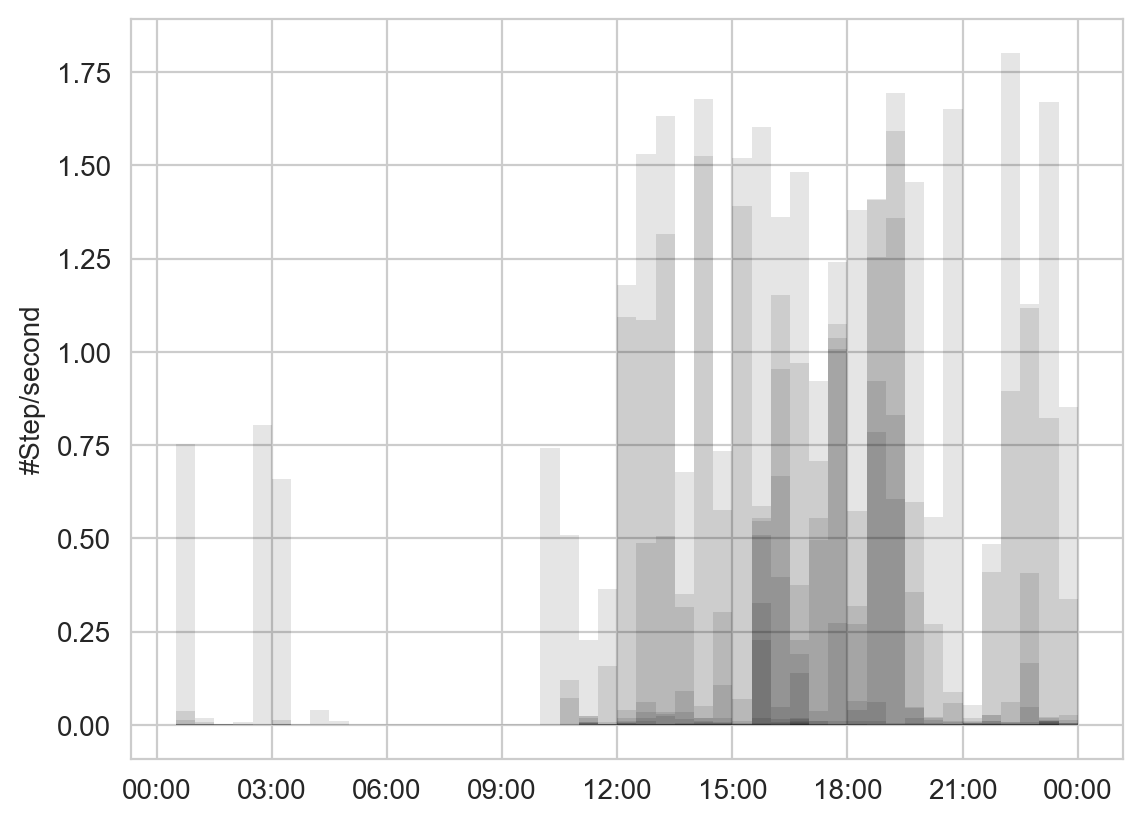

In [9]:
fig, ax = plt.subplots()
for date in uniq_date:

    # Select data from that date
    df_date = df[df.dt.dt.date == date]

    # Reference point (today but the choice is arbitrary)
    some_day = datetime.today()
    midnight = datetime.combine(some_day, time.min)
    min_ts = midnight.timestamp()
    max_ts = (midnight + timedelta(days=1)).timestamp()

    x = df_date.dt.map(lambda entry: entry.replace(day=some_day.day, month=some_day.month, year=some_day.year))
    x_sec = x.map(lambda entry: entry.timestamp()).values - min_ts
    y = df_date.step_midnight.values

    # Patch in case of re-installation
    if np.sum(np.diff(y) < 0) > 0:
        idx = 1 + np.arange(len(y)-1)[np.diff(y) < 0][0]
        y[idx:] =  y[idx-1] + y[idx:] - y[idx]

    # Choose some time precision
    dx = 60*30

    # Do the interpolation
    f = interpolate.interp1d(x_sec, y, kind="linear")
    min_val = 0
    max_val = max_ts - min_ts
    x_new = np.arange(min_val, max_val+0.00001, dx)
    y_new = np.zeros_like(x_new)
    idx = np.arange(len(x_new))
    can_be_interpolated = idx[(x_new >= x_sec.min()) * (x_new <= x_sec.max())]
    y_new[can_be_interpolated] = f(x_new[can_be_interpolated])
    y_new[x_new < x_sec.min()] = 0
    y_new[x_new > x_sec.max()] = y.max()

    # Compute the diff
    y_diff = np.diff(y_new)/dx
    x_diff =  [datetime.fromtimestamp(min_ts + x_) for x_ in x_new[1:]]

    # Plot
    color = "black"
    ax.fill_between(x_diff, y_diff, step="post", alpha=0.1, color=color, linewidth=0)
    #ax.step(x_diff, y_diff, where="post", color=color, linewidth=0.2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', ))
ax.set_ylabel("#Step/second")
plt.show()

# Look at all users

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/25J1_activity_2023-07-12_12-46-19.csv`...
n rows = 71342


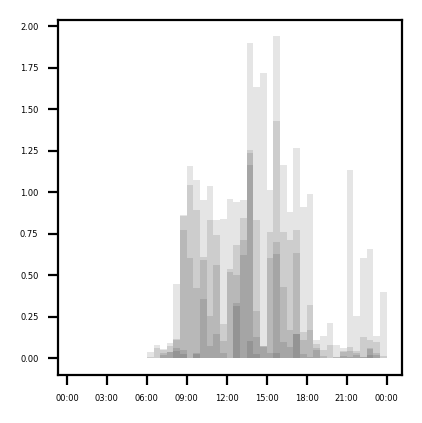

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/272L_activity_2023-07-12_12-46-19.csv`...
n rows = 57543


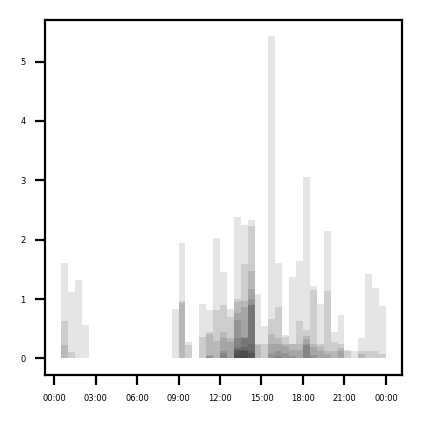

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/102P_activity_2023-07-12_12-46-19.csv`...
n rows = 36266


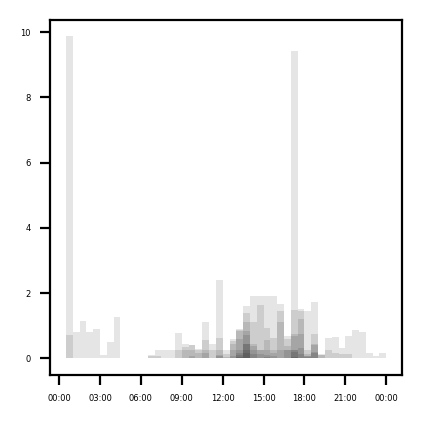

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/182E_activity_2023-07-12_12-46-19.csv`...
n rows = 0
Skipping /Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/182E_activity_2023-07-12_12-46-19.csv, not enough entries
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/28E1_activity_2023-07-12_12-46-19.csv`...
n rows = 35247


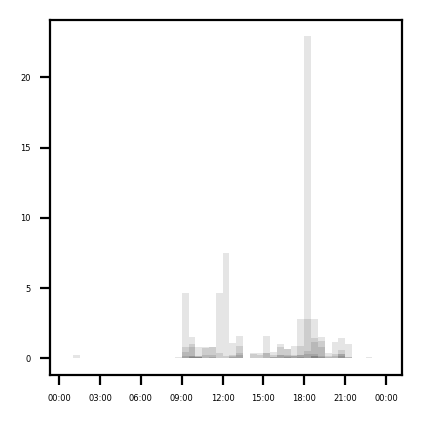

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/272W_activity_2023-07-12_12-46-19.csv`...
n rows = 7114


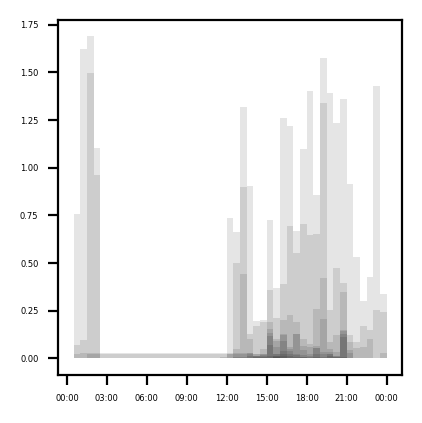

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/152A_activity_2023-07-12_12-46-19.csv`...
n rows = 59444


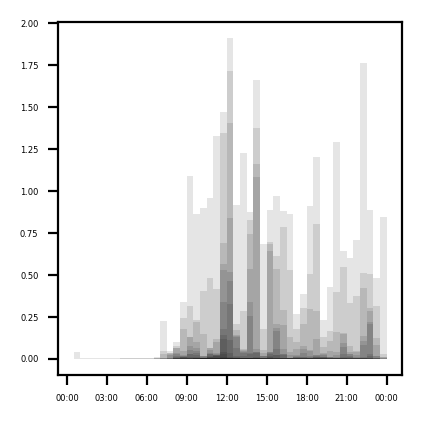

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/15SM_activity_2023-07-12_12-46-19.csv`...
n rows = 51973


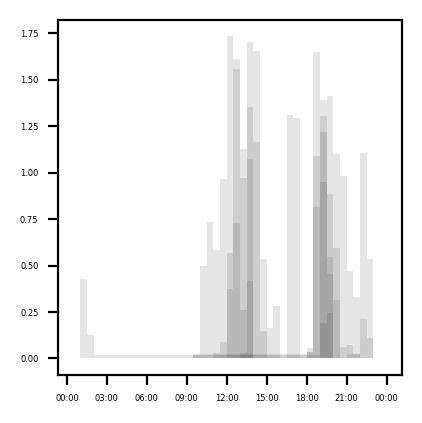

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/19AN_activity_2023-07-12_12-46-19.csv`...
n rows = 60881


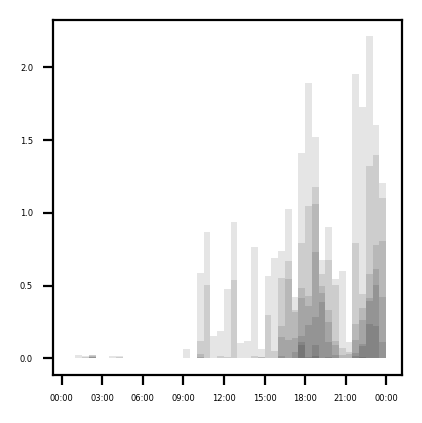

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/162G_activity_2023-07-12_12-46-19.csv`...
n rows = 24517


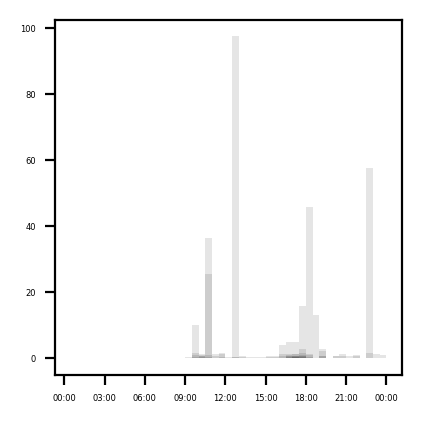

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/09A1_activity_2023-07-12_12-46-19.csv`...
n rows = 41682


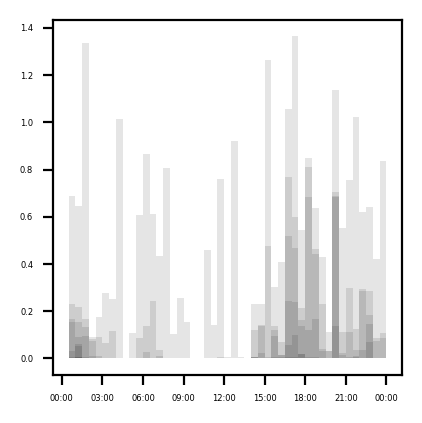

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/302M_activity_2023-07-12_12-46-19.csv`...
n rows = 99170


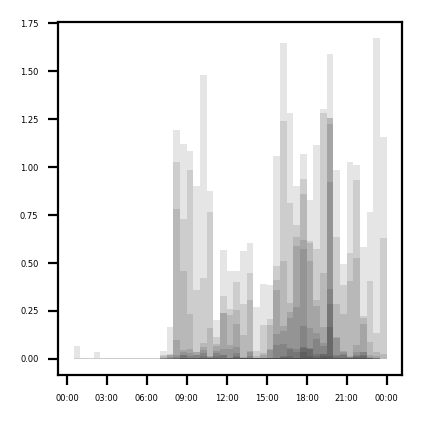

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/162W_activity_2023-07-12_12-46-19.csv`...
n rows = 85286


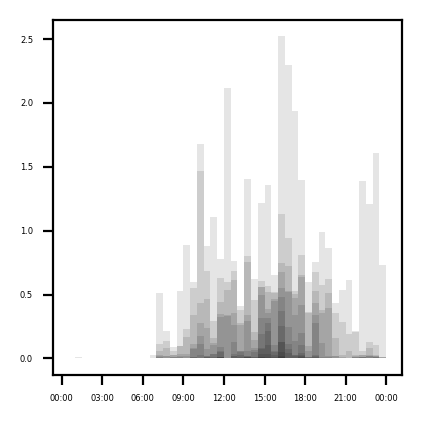

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/02TA_activity_2023-07-12_12-46-19.csv`...
n rows = 21242


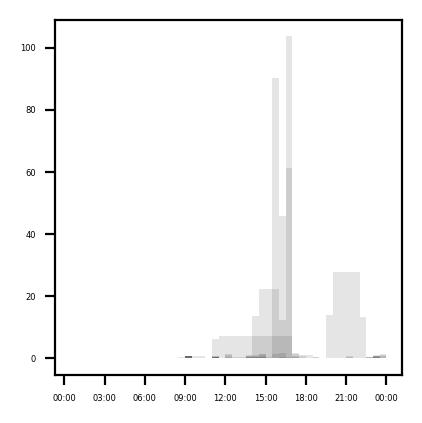

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/28OM_activity_2023-07-12_12-46-19.csv`...
n rows = 118657


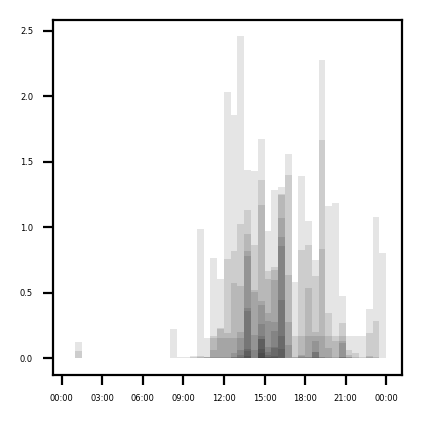

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/12AE_activity_2023-07-12_12-46-19.csv`...
n rows = 41507


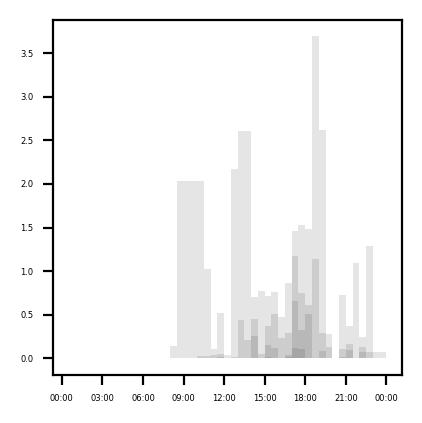

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/192Z_activity_2023-07-12_12-46-19.csv`...
n rows = 28018


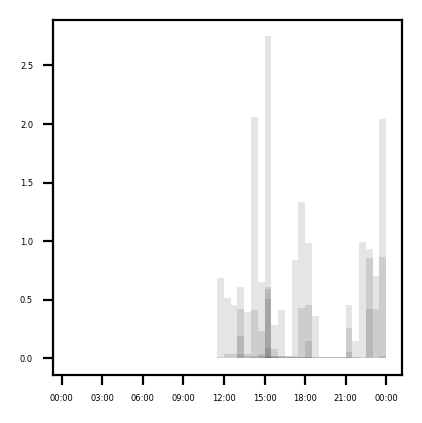

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/06DS_activity_2023-07-12_12-46-19.csv`...
n rows = 0
Skipping /Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/06DS_activity_2023-07-12_12-46-19.csv, not enough entries
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/1362_activity_2023-07-12_12-46-19.csv`...
n rows = 7301


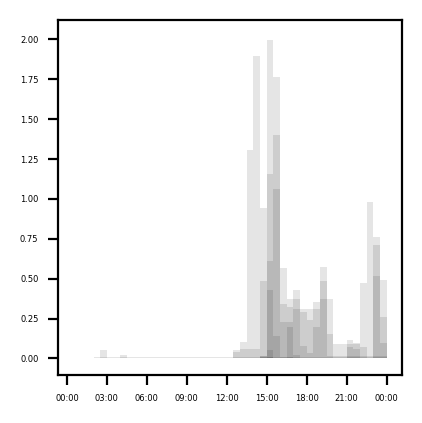

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/24SA_activity_2023-07-12_12-46-19.csv`...
n rows = 82564


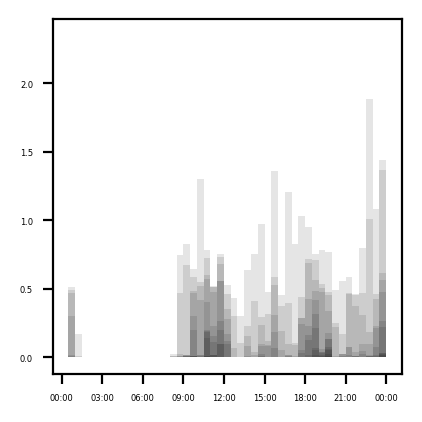

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/23MI_activity_2023-07-12_12-46-19.csv`...
n rows = 1
Skipping /Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/23MI_activity_2023-07-12_12-46-19.csv, not enough entries
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/15MM_activity_2023-07-12_12-46-19.csv`...
n rows = 68180


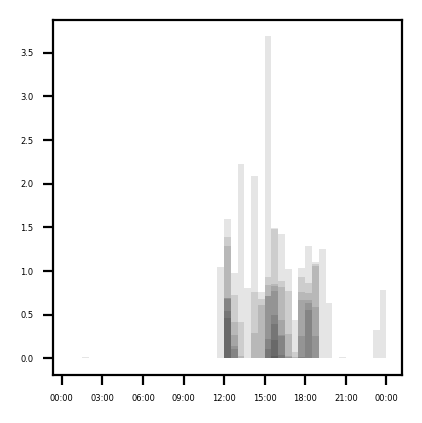

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/22MH_activity_2023-07-12_12-46-19.csv`...
n rows = 90482


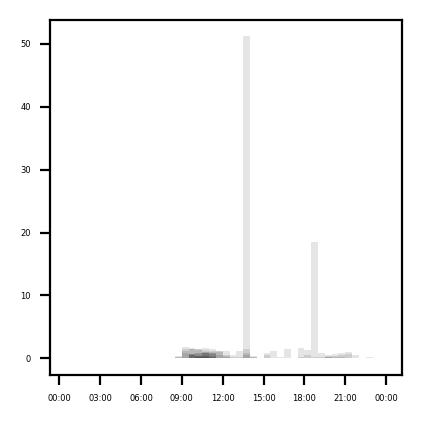

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/27SI_activity_2023-07-12_12-46-19.csv`...
n rows = 23814


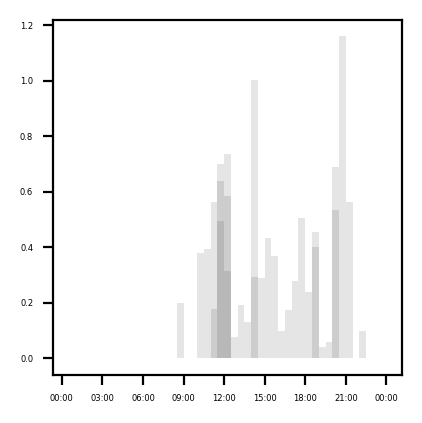

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/12JA_activity_2023-07-12_12-46-19.csv`...
n rows = 64253


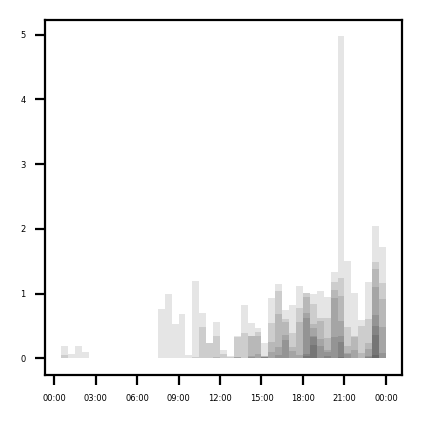

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/132L_activity_2023-07-12_12-46-19.csv`...
n rows = 17502


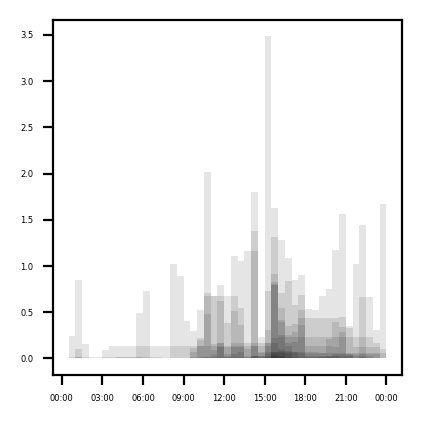

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/09AU_activity_2023-07-12_12-46-19.csv`...
n rows = 9255


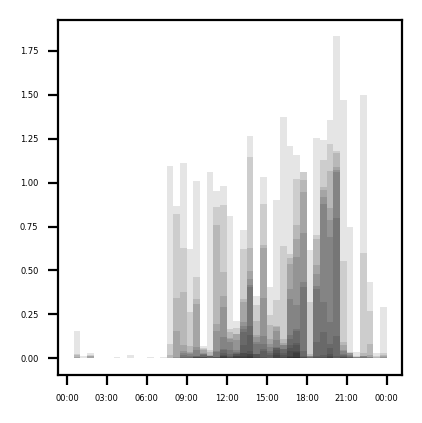

Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/student_a_beta1_activity_2023-07-12_12-46-19.csv`
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11SA_activity_2023-07-12_12-46-19.csv`...
n rows = 28764


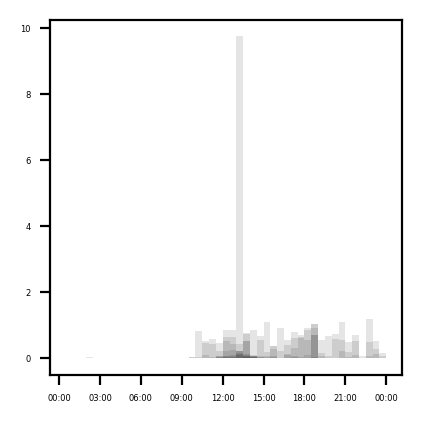

Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/michele_beta1_activity_2023-07-12_12-46-19.csv`
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/18DA_activity_2023-07-12_12-46-19.csv`...
n rows = 76937


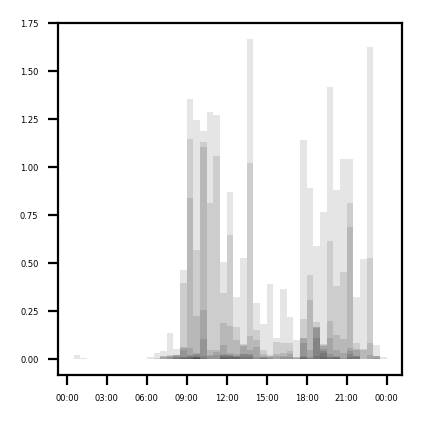

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/252S_activity_2023-07-12_12-46-19.csv`...
n rows = 62428


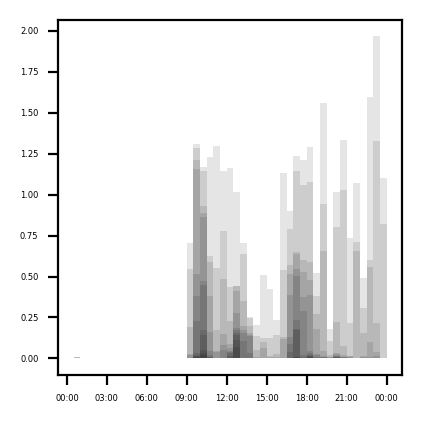

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11AV_activity_2023-07-12_12-46-19.csv`...
n rows = 55547


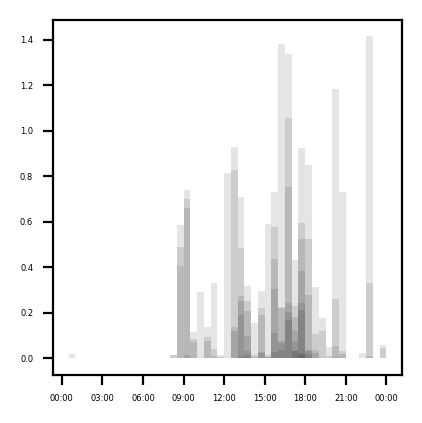

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/10AN_activity_2023-07-12_12-46-19.csv`...
n rows = 84069


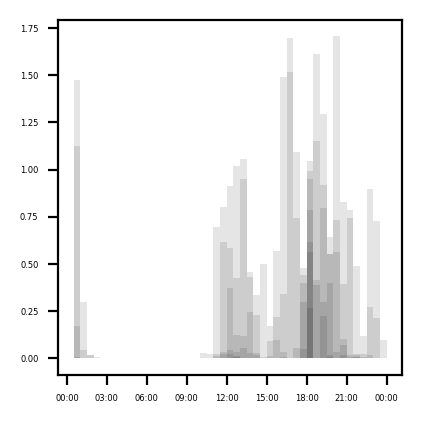

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/25TI_activity_2023-07-12_12-46-19.csv`...
n rows = 2853
Skipping /Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/25TI_activity_2023-07-12_12-46-19.csv, not enough entries
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/242K_activity_2023-07-12_12-46-19.csv`...
n rows = 80294


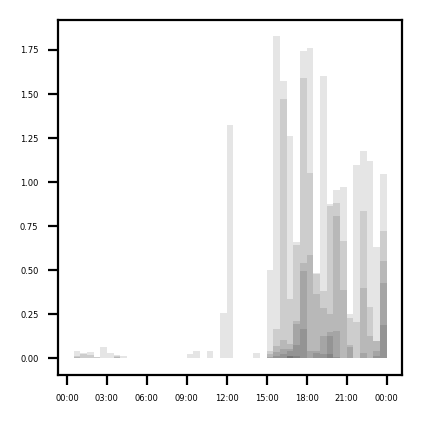

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11KD_activity_2023-07-12_12-46-19.csv`...
n rows = 86051


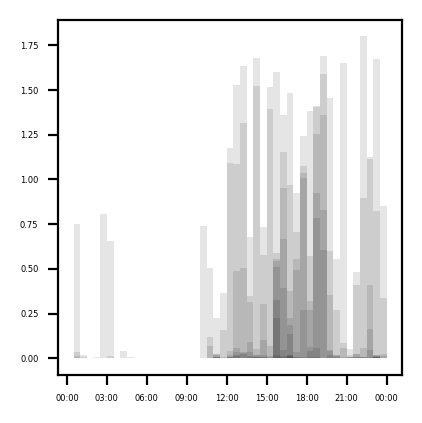

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/13SK_activity_2023-07-12_12-46-19.csv`...
n rows = 0
Skipping /Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/13SK_activity_2023-07-12_12-46-19.csv, not enough entries
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/152O_activity_2023-07-12_12-46-19.csv`...
n rows = 42771


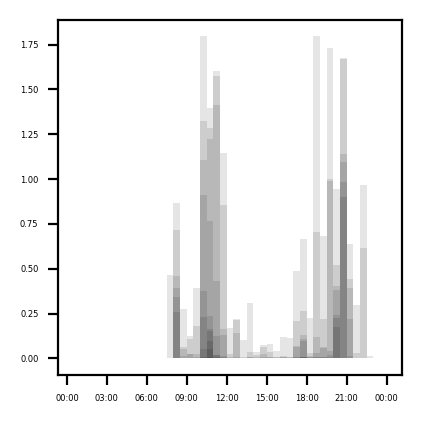

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/02MY_activity_2023-07-12_12-46-19.csv`...
n rows = 83169


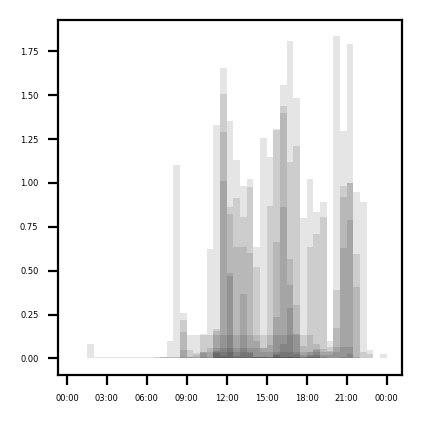

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/06AS_activity_2023-07-12_12-46-19.csv`...
n rows = 1958
Skipping /Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/06AS_activity_2023-07-12_12-46-19.csv, not enough entries
Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/smallobj_activity_2023-07-12_12-46-19.csv`
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/19EN_activity_2023-07-12_12-46-19.csv`...
n rows = 62738


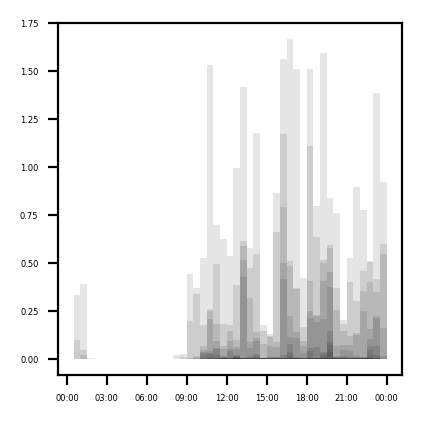

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/07EI_activity_2023-07-12_12-46-19.csv`...
n rows = 1
Skipping /Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/07EI_activity_2023-07-12_12-46-19.csv, not enough entries
Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/152G_activity_2023-07-12_12-46-19.csv`...
n rows = 129931


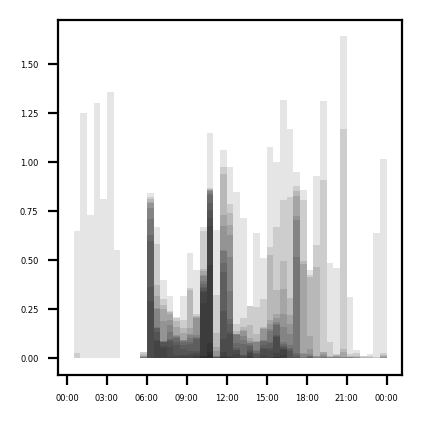

Considering the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/13KU_activity_2023-07-12_12-46-19.csv`...
n rows = 56519


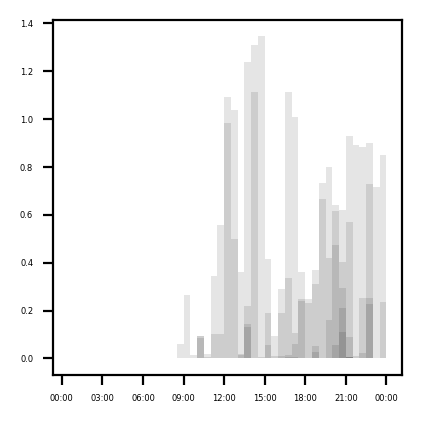

In [28]:
for file in glob.glob(f"{DOWNLOAD_FOLDER_ABSOLUTE_PATH}/*activity*.csv"):

    if "smallobj" in file or "michele" in file or "student" in file:
        print(f"Skipping file `{file}`")
        continue

    print(f"Considering the file `{file}`...")

    df = pd.read_csv(file, index_col=0)
    print(f"n rows = {len(df)}")
    if len(df) < 5000:
        print(f"Skipping {file}, not enough entries")
        continue

    df.dt = pd.to_datetime(df.dt, utc=False, format='ISO8601')
    df.dt = df.dt.dt.tz_convert('Europe/London')

    uniq_date = df.dt.dt.date.unique()

    plt.rcParams.update({'font.size': 3})
    fig, ax = plt.subplots(figsize=(2, 2))
    for date in uniq_date:

        # Select data from that date
        df_date = df[df.dt.dt.date == date]

        # Reference point (today but the choice is arbitrary)
        some_day = datetime.today()
        midnight = datetime.combine(some_day, time.min)
        min_ts = midnight.timestamp()
        max_ts = (midnight + timedelta(days=1)).timestamp()

        x = df_date.dt.map(lambda entry: entry.replace(day=some_day.day, month=some_day.month, year=some_day.year))
        x_sec = x.map(lambda entry: entry.timestamp()).values - min_ts
        y = df_date.step_midnight.values

        # Patch in case of re-installation
        if np.sum(np.diff(y) < 0) > 0:
            idx = 1 + np.arange(len(y)-1)[np.diff(y) < 0][0]
            y[idx:] =  y[idx-1] + y[idx:] - y[idx]

        # Choose some time precision
        dx = 60*30

        # Do the interpolation
        f = interpolate.interp1d(x_sec, y, kind="linear")
        min_val = 0
        max_val = max_ts - min_ts
        x_new = np.arange(min_val, max_val+0.00001, dx)
        y_new = np.zeros_like(x_new)
        idx = np.arange(len(x_new))
        can_be_interpolated = idx[(x_new >= x_sec.min()) * (x_new <= x_sec.max())]
        y_new[can_be_interpolated] = f(x_new[can_be_interpolated])
        y_new[x_new < x_sec.min()] = 0
        y_new[x_new > x_sec.max()] = y.max()

        # Compute the diff
        y_diff = np.diff(y_new)/dx
        x_diff =  [datetime.fromtimestamp(min_ts + x_) for x_ in x_new[1:]]

        # Plot
        color = "black"
        ax.fill_between(x_diff, y_diff, step="post", alpha=0.1, color=color, linewidth=0)
        #ax.step(x_diff, y_diff, where="post", color=color, linewidth=0.2)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', ))
    fig.tight_layout()
    plt.show()

# Trials

In [22]:
len(np.diff(y_new)/ 2000)

48

In [20]:
np.diff(y_new)/ 2000

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.34123400e-05, 1.29701069e-04, 1.29701069e-04,
       1.29701069e-04, 2.38103607e-01, 1.36532316e-04, 1.36532316e-04,
       1.36532316e-04, 9.21270257e-02, 1.32575727e-04, 1.32575727e-04,
       1.32575727e-04, 1.32677819e-02, 1.98354828e-01, 1.17723598e+00,
       1.21244370e+00, 3.72747236e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [204]:
y_new

array([0.00000000e+00, 8.64569169e+00, 9.32490548e+01, 9.69407513e+01,
       1.00632448e+02, 1.13395565e+02, 1.40213487e+02, 1.54044460e+02,
       1.64610958e+02, 1.16882122e+03, 1.20819396e+03, 1.45008783e+03,
       2.57142785e+03, 2.57461165e+03, 2.57779546e+03, 2.58374213e+03,
       2.80634766e+03, 4.19677689e+03, 5.28308623e+03, 5.28762688e+03,
       6.62005771e+03, 8.81212707e+03, 1.16903327e+04, 1.32553774e+04,
       1.48041482e+04, 1.48080849e+04, 1.48120216e+04])

In [205]:
np.diff(y_new)

array([   8.64569169,   84.60336308,    3.69169657,    3.69169657,
         12.76311735,   26.81792177,   13.83097314,   10.56649768,
       1004.21025724,   39.37274983,  241.89386037, 1121.34002295,
          3.18380533,    3.18380533,    5.94667343,  222.60553017,
       1390.4292253 , 1086.30933974,    4.54065475, 1332.43082902,
       2192.06935528, 2878.20558526, 1565.04470058, 1548.77084107,
          3.93672114,    3.93672114])

In [206]:
x_new[1:]

array([ 1800,  3600,  5400,  7200,  9000, 10800, 12600, 14400, 16200,
       18000, 19800, 21600, 23400, 25200, 27000, 28800, 30600, 32400,
       34200, 36000, 37800, 39600, 41400, 43200, 45000, 46800])

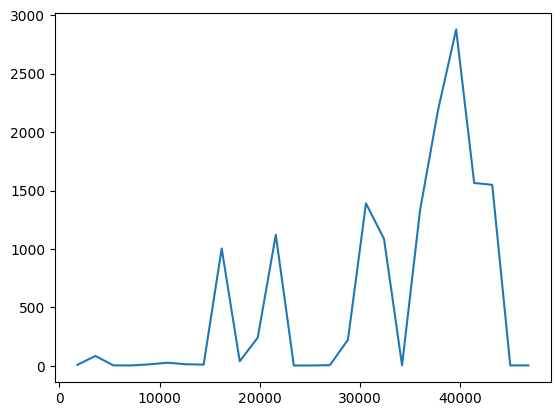

In [207]:
plt.plot(x_new[1:],np.diff(y_new))

In [160]:
np.diff(y_new)

array([  96.12037433,   41.07100943,   31.57625895, 1293.70833349,
       1114.96572656, 1421.18166189, 1291.02158642, 6450.20578343,
       3068.23418014])

In [67]:
print(y)

[    0    11    12    22    29    39    46    48    58    67    74    77
    87    92   102   106   116   123   132   135   145   151   163   173
   181   182   192   203   214   226   236   246   257   267   268   278
   300   311   322   333   344   355   367   389   461   471   481   493
   516   539   550   559   560   570   580   592   604   615   626   638
   649   660   671   681   693   704   716   727   738   749   761   771
   782   793   804   815   826   837   849   860   871   882   893   904
   915   927   938   949   960   971   983   994  1005  1016  1028  1039
  1050  1061  1072  1082  1092  1103  1113  1123  1134  1144  1154  1164
  1223  1231  1314  1324  1382  1391  1465  1517  1527  1537  1578  1589
  1599  1629  1744  1807  1828  1870  1880  2043  2170  2213  2224  2235
  2244  2254  2255  2340  2570  2580  2590  2593  2603  2614  2623  2633
  2642  2651  2699  2708  2718  2728  2739  2749  2760  2770  2780  2832
  2843  2895  2926  2957  2968  3030  3041  3096  3

In [69]:
print(x_sec)

[    0.          2290.15799999  2290.21299994  2572.61199999
  2572.61799991  2572.63499999  2572.66199994  2572.66599989
  2931.34499991  2932.86799991  2937.87299991  2941.0999999
  2990.96700001  2990.9849999   7866.79199994  7866.83299994
  9399.05799997  9404.0539999   9419.88999999  9419.90499997
 12067.06799996 12067.13599992 14167.46499991 15610.92299998
 15610.94400001 15610.9519999  15610.96399999 15610.977
 15610.98099995 15610.9849999  15610.99199998 15611.
 15611.03999996 15611.08099997 15611.097      15611.11299992
 15611.13499999 15611.148      15611.15999997 15611.16699994
 15611.17199993 15611.17799997 15611.18699992 15611.19699991
 15611.204      15966.46399999 15966.51899993 15966.53699994
 15966.5819999  15966.602      15966.63599992 15966.65799999
 15966.676      15966.69999993 15966.72099996 15966.76099992
 15966.7759999  15966.78699994 15966.79799998 15966.8039999
 15966.81299996 15966.81999993 15966.8269999  15966.85799992
 15966.86799991 15966.91399992 15966.95

In [80]:
delta_x = np.diff(x_sec)

In [81]:
delta_step = np.diff(y)

In [82]:
step_per_sec = delta_step / delta_x

In [83]:
delta_step

array([  11,    1,   10,    7,   10,    7,    2,   10,    9,    7,    3,
         10,    5,   10,    4,   10,    7,    9,    3,   10,    6,   12,
         10,    8,    1,   10,   11,   11,   12,   10,   10,   11,   10,
          1,   10,   22,   11,   11,   11,   11,   11,   12,   22,   72,
         10,   10,   12,   23,   23,   11,    9,    1,   10,   10,   12,
         12,   11,   11,   12,   11,   11,   11,   10,   12,   11,   12,
         11,   11,   11,   12,   10,   11,   11,   11,   11,   11,   11,
         12,   11,   11,   11,   11,   11,   11,   12,   11,   11,   11,
         11,   12,   11,   11,   11,   12,   11,   11,   11,   11,   10,
         10,   11,   10,   10,   11,   10,   10,   10,   59,    8,   83,
         10,   58,    9,   74,   52,   10,   10,   41,   11,   10,   30,
        115,   63,   21,   42,   10,  163,  127,   43,   11,   11,    9,
         10,    1,   85,  230,   10,   10,    3,   10,   11,    9,   10,
          9,    9,   48,    9,   10,   10,   11,   

In [98]:
delta_x

array([2.29015800e+03, 5.49999475e-02, 2.82399000e+02, 5.99992275e-03,
       1.70000792e-02, 2.69999504e-02, 3.99994850e-03, 3.58679000e+02,
       1.52300000e+00, 5.00500000e+00, 3.22700000e+00, 4.98670001e+01,
       1.79998875e-02, 4.87580700e+03, 4.10000086e-02, 1.53222500e+03,
       4.99599993e+00, 1.58360001e+01, 1.49999857e-02, 2.64716300e+03,
       6.79999590e-02, 2.10032900e+03, 1.44345800e+03, 2.10000277e-02,
       7.99989700e-03, 1.20000839e-02, 1.30000114e-02, 3.99994850e-03,
       3.99994850e-03, 7.00008869e-03, 8.00001621e-03, 3.99999619e-02,
       4.10000086e-02, 1.60000324e-02, 1.59999132e-02, 2.20000744e-02,
       1.30000114e-02, 1.19999647e-02, 6.99996948e-03, 4.99999523e-03,
       6.00004196e-03, 8.99994373e-03, 9.99999046e-03, 7.00008869e-03,
       3.55260000e+02, 5.49999475e-02, 1.80000067e-02, 4.49999571e-02,
       2.00001001e-02, 3.39999199e-02, 2.20000744e-02, 1.80000067e-02,
       2.39999294e-02, 2.10000277e-02, 3.99999619e-02, 1.49999857e-02,
      

In [99]:
step_per_sec

array([4.80316205e-03, 1.81818355e+01, 3.54108903e-02, 1.16668169e+03,
       5.88232555e+02, 2.59259735e+02, 5.00006437e+02, 2.78800822e-02,
       5.90938936e+00, 1.39860140e+00, 9.29656028e-01, 2.00533418e-01,
       2.77779514e+02, 2.05094254e-03, 9.75609552e+01, 6.52645662e-03,
       1.40112092e+00, 5.68325332e-01, 2.00000191e+02, 3.77762911e-03,
       8.82353473e+01, 5.71339062e-03, 6.92780808e-03, 3.80951879e+02,
       1.25001609e+02, 8.33327505e+02, 8.46153101e+02, 2.75003541e+03,
       3.00003862e+03, 1.42855333e+03, 1.24999747e+03, 2.75000262e+02,
       2.43902388e+02, 6.24998733e+01, 6.25003390e+02, 9.99996619e+02,
       8.46153101e+02, 9.16669362e+02, 1.57143542e+03, 2.20000210e+03,
       1.83332051e+03, 1.33334167e+03, 2.20000210e+03, 1.02855840e+04,
       2.81483984e-02, 1.81818355e+02, 6.66666419e+02, 5.11111599e+02,
       1.14999424e+03, 3.23530174e+02, 4.09089526e+02, 5.55555350e+01,
       4.16667892e+02, 4.76189849e+02, 3.00000286e+02, 8.00000763e+02,
      

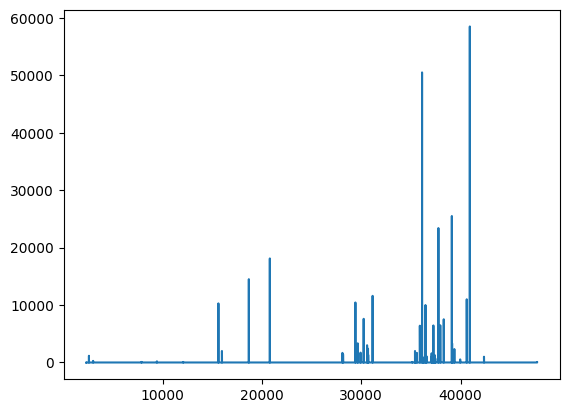

In [178]:
plt.step(x_sec[1:], step_per_sec)

In [85]:
x_linspace = np.linspace(0, max(x_sec), 100)

In [175]:
y_vel = np.zeros_like(x_linspace)
for i, x in enumerate(x_linspace):

    diff = x - x_sec
    diff[diff < 0] = np.inf
    idx = np.argmin(diff)
    # print(idx)
    if idx == len(step_per_sec):
        idx -= 1
    # print(idx)
    # print(x, x_sec[idx])
    y_vel[i] = step_per_sec[idx]


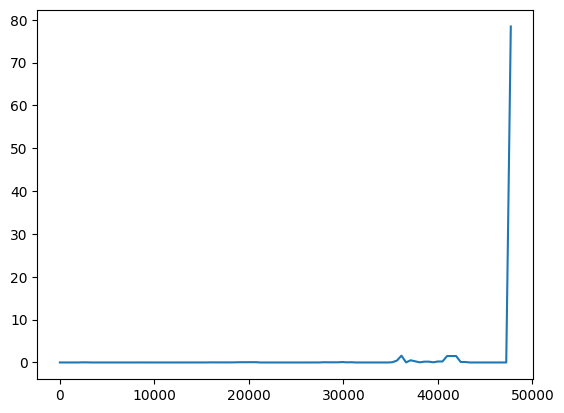

In [176]:
plt.plot(x_linspace, y_vel)

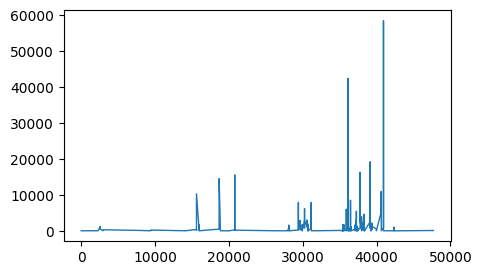

In [28]:
fig, ax = plt.subplots(figsize=(5, 3))

for date in uniq_date:
    df_date = df[df.dt.dt.date == date]
    min_date = df.dt.dt.date.min()
    n_days_since_beginning = (date - min_date).days
    x = df_date.dt.map(lambda entry: entry.replace(day=1, month=1, year=2000))
    min_ts = np.min(x).timestamp()
    x_sec = x.map(lambda entry: entry.timestamp()).values - min_ts
    # # print(x_sec)
    y = df_date.step_midnight.values
    y_grad = np.gradient(y, x_sec)
    # # y_diff =
    ax.plot(x_sec, y_grad, linewidth=1 + n_days_since_beginning*0.3)

    #xformatter = mdates.DateFormatter('%H:%M', )
    #ax.xaxis.set_major_formatter(xformatter)
    break

plt.show()

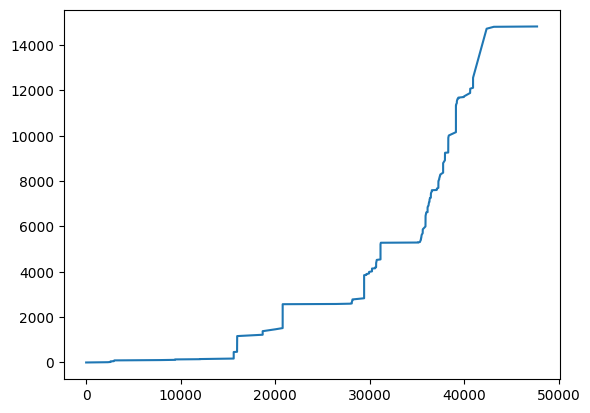

In [30]:
plt.plot(x_sec, y)

In [61]:
def non_uniform_savgol(x, y, window, polynom):
    """
    Applies a Savitzky-Golay filter to y with non-uniform spacing
    as defined in x

    This is based on https://dsp.stackexchange.com/questions/1676/savitzky-golay-smoothing-filter-for-not-equally-spaced-data
    The borders are interpolated like scipy.signal.savgol_filter would do

    Parameters
    ----------
    x : array_like
        List of floats representing the x values of the data
    y : array_like
        List of floats representing the y values. Must have same length
        as x
    window : int (odd)
        Window length of datapoints. Must be odd and smaller than x
    polynom : int
        The order of polynom used. Must be smaller than the window size

    Returns
    -------
    np.array of float
        The smoothed y values
    """
    if len(x) != len(y):
        raise ValueError('"x" and "y" must be of the same size')

    if len(x) < window:
        raise ValueError('The data size must be larger than the window size')

    if type(window) is not int:
        raise TypeError('"window" must be an integer')

    if window % 2 == 0:
        raise ValueError('The "window" must be an odd integer')

    if type(polynom) is not int:
        raise TypeError('"polynom" must be an integer')

    if polynom >= window:
        raise ValueError('"polynom" must be less than "window"')

    half_window = window // 2
    polynom += 1

    # Initialize variables
    A = np.empty((window, polynom))     # Matrix
    tA = np.empty((polynom, window))    # Transposed matrix
    t = np.empty(window)                # Local x variables
    y_smoothed = np.full(len(y), np.nan)

    # Start smoothing
    for i in range(half_window, len(x) - half_window, 1):
        # Center a window of x values on x[i]
        for j in range(0, window, 1):
            t[j] = x[i + j - half_window] - x[i]

        # Create the initial matrix A and its transposed form tA
        for j in range(0, window, 1):
            r = 1.0
            for k in range(0, polynom, 1):
                A[j, k] = r
                tA[k, j] = r
                r *= t[j]

        # Multiply the two matrices
        tAA = np.matmul(tA, A)

        # Invert the product of the matrices
        tAA = np.linalg.inv(tAA)

        # Calculate the pseudoinverse of the design matrix
        coeffs = np.matmul(tAA, tA)

        # Calculate c0 which is also the y value for y[i]
        y_smoothed[i] = 0
        for j in range(0, window, 1):
            y_smoothed[i] += coeffs[0, j] * y[i + j - half_window]

        # If at the end or beginning, store all coefficients for the polynom
        if i == half_window:
            first_coeffs = np.zeros(polynom)
            for j in range(0, window, 1):
                for k in range(polynom):
                    first_coeffs[k] += coeffs[k, j] * y[j]
        elif i == len(x) - half_window - 1:
            last_coeffs = np.zeros(polynom)
            for j in range(0, window, 1):
                for k in range(polynom):
                    last_coeffs[k] += coeffs[k, j] * y[len(y) - window + j]

    # Interpolate the result at the left border
    for i in range(0, half_window, 1):
        y_smoothed[i] = 0
        x_i = 1
        for j in range(0, polynom, 1):
            y_smoothed[i] += first_coeffs[j] * x_i
            x_i *= x[i] - x[half_window]

    # Interpolate the result at the right border
    for i in range(len(x) - half_window, len(x), 1):
        y_smoothed[i] = 0
        x_i = 1
        for j in range(0, polynom, 1):
            y_smoothed[i] += last_coeffs[j] * x_i
            x_i *= x[i] - x[-half_window - 1]

    return y_smoothed

557


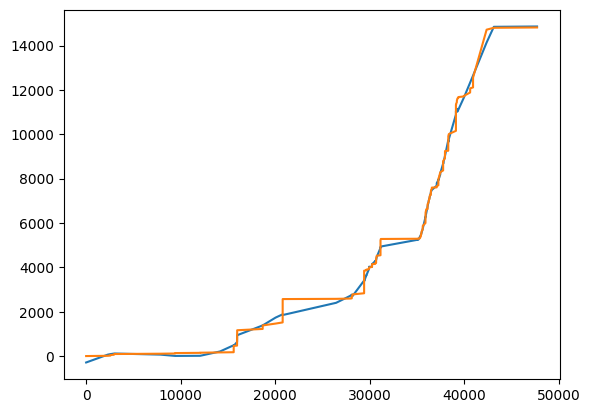

In [102]:
print(len(y))
x_sec1 = x_sec / x_sec.max()
y_smooth = non_uniform_savgol(x_sec1, y,
                                  window=83, # window size used for filtering
                                  polynom=3) # order of fitted polynomial

plt.plot(x_sec, y_smooth)
plt.plot(x_sec, y)

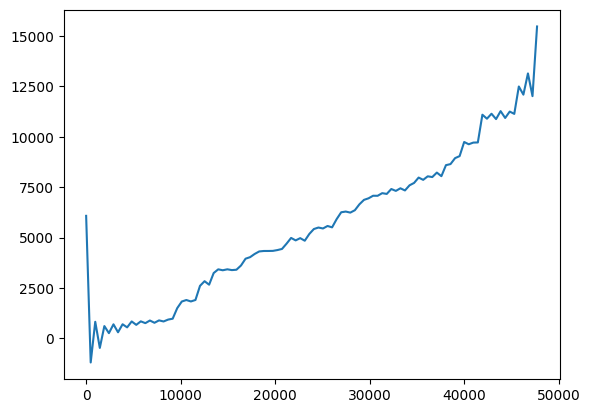

In [103]:
resampled_x, resampled_t = signal.resample(y_smooth, 100, t=x_sec1)
plt.plot(np.linspace(x_sec[0], x_sec[-1], 100), resampled_x)

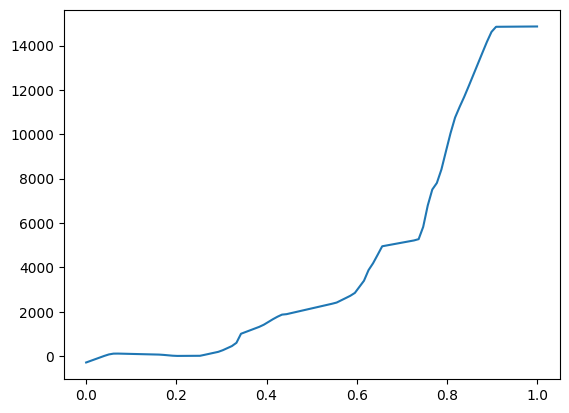

In [104]:
flinear = interpolate.interp1d(x_sec1, y_smooth)
x_new = np.linspace(0, 1, 100)
y_new = flinear(x_new)
plt.plot(x_new, y_new)

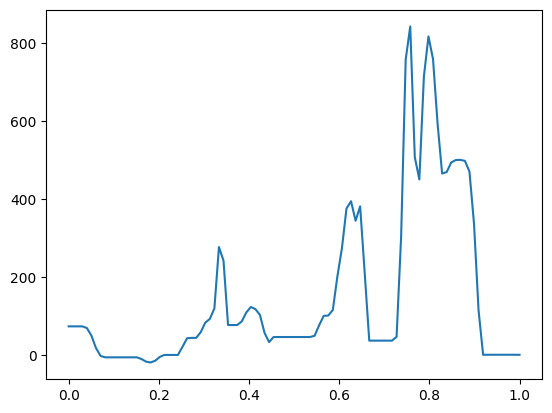

In [105]:
plt.plot(x_new, np.gradient(y_new))